# Lecture 4, Classic ML, Data Engineering

## Normality Tests

### Shapiro-Milk Test

Test with normally distributed data:
Shapiro-Wilk test results:
Statistic: 0.9999908845449024
p-value: 0.999830080627938
The sample looks Gaussian (fail to reject H0)

Test with non-normally distributed data:
Shapiro-Wilk test results:
Statistic: 0.815465558446529
p-value: 9.794115697564333e-130
The sample does not look Gaussian (reject H0)


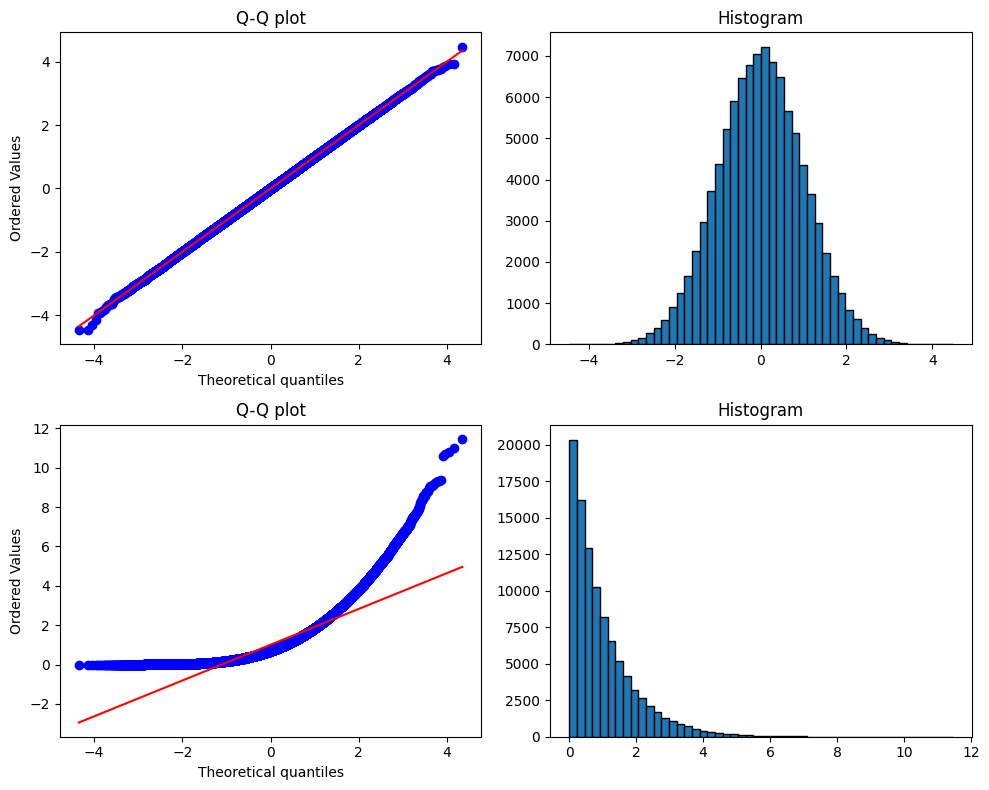

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def perform_shapiro_wilk_test(data, ax1, ax2):
    # Perform Shapiro-Wilk test
    statistic, p_value = stats.shapiro(data)
    
    print(f"Shapiro-Wilk test results:")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}")
    
    # Interpret the results
    alpha = 0.05
    if p_value > alpha:
        print("The sample looks Gaussian (fail to reject H0)")
    else:
        print("The sample does not look Gaussian (reject H0)")

    # Create a Q-Q plot
    stats.probplot(data, dist="norm", plot=ax1)
    ax1.set_title("Q-Q plot")

    # Create a histogram
    ax2.hist(data, bins=50, edgecolor='k')
    ax2.set_title("Histogram")

# Example usage
# Generate some sample data
np.random.seed(42)

normal_data = np.random.normal(loc=0, scale=1, size=100000)
non_normal_data = np.random.exponential(scale=1, size=100000)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

print("Test with normally distributed data:")
perform_shapiro_wilk_test(normal_data, axs[0, 0], axs[0, 1])

print("\nTest with non-normally distributed data:")
perform_shapiro_wilk_test(non_normal_data, axs[1, 0], axs[1, 1])

plt.tight_layout()
plt.show()

### Kolmogorov-Smirnov Test

Test with normally distributed data:
Kolmogorov-Smirnov test results:
Statistic: 0.000624912606224215
p-value: 0.8294382548656889
The sample looks Gaussian (fail to reject H0)


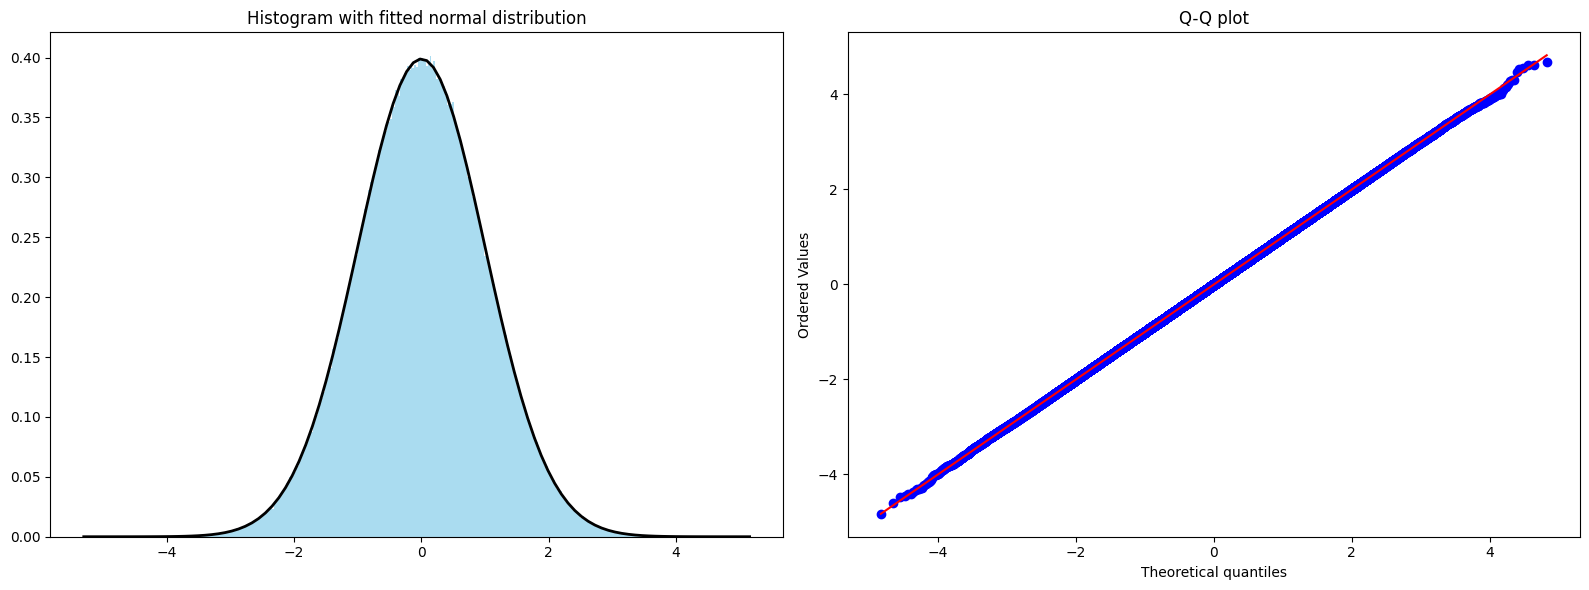


Test with non-normally distributed data:
Kolmogorov-Smirnov test results:
Statistic: 0.15848225838361835
p-value: 7.331557687403374e-220
The sample does not look Gaussian (reject H0)


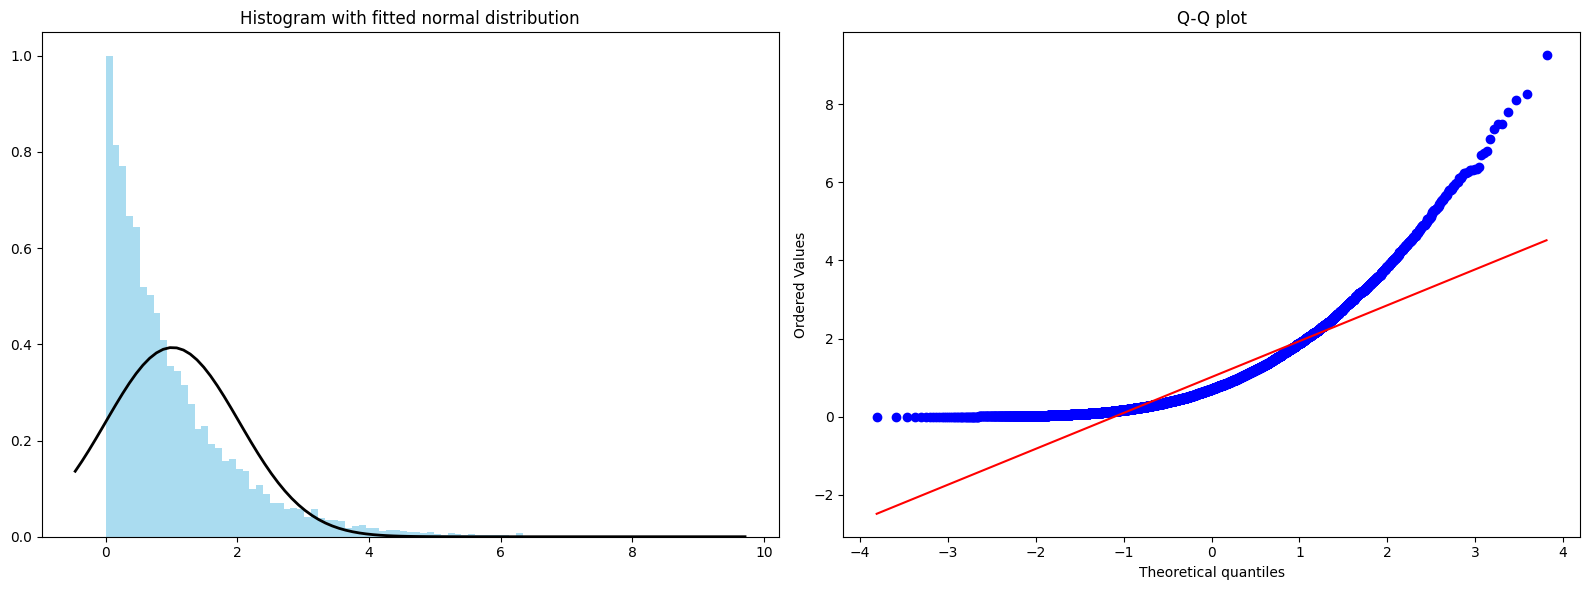

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def perform_ks_test(data):
    # Calculate mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)
    
    # Perform Kolmogorov-Smirnov test
    statistic, p_value = stats.kstest(data, 'norm', args=(mean, std))
    
    print(f"Kolmogorov-Smirnov test results:")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}")
    
    # Interpret the results
    alpha = 0.05
    if p_value > alpha:
        print("The sample looks Gaussian (fail to reject H0)")
    else:
        print("The sample does not look Gaussian (reject H0)")

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot histogram with fitted normal distribution
    axs[0].hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
    xmin, xmax = axs[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    axs[0].plot(x, p, 'k', linewidth=2)
    axs[0].set_title("Histogram with fitted normal distribution")
    
    # Create a Q-Q plot
    stats.probplot(data, dist="norm", plot=axs[1])
    axs[1].set_title("Q-Q plot")
    
    plt.tight_layout()
    plt.show()

# Example usage
# Generate some sample data
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=1000000)
non_normal_data = np.random.exponential(scale=1, size=10000)

print("Test with normally distributed data:")
perform_ks_test(normal_data)

print("\nTest with non-normally distributed data:")
perform_ks_test(non_normal_data)

### Correlation Analysis

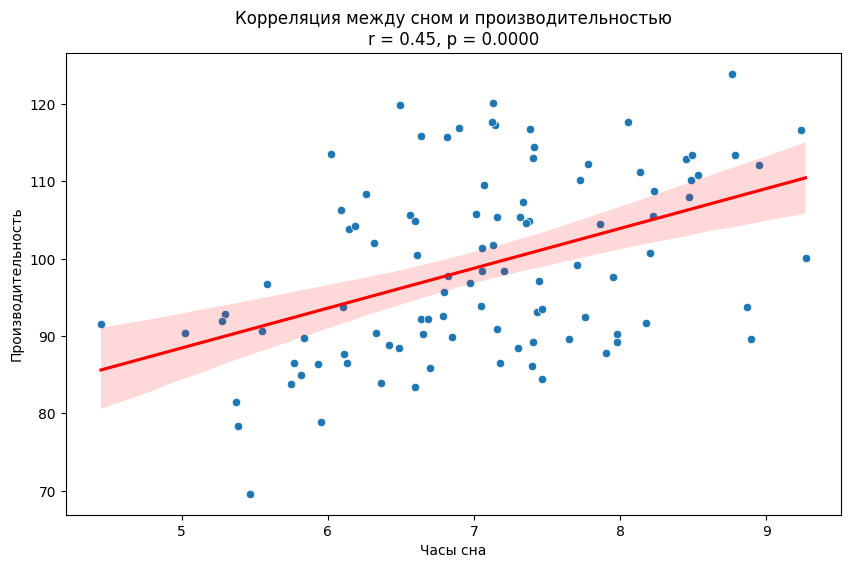

Корреляционная матрица:
                    Часы сна  Производительность
Часы сна            1.000000            0.450449
Производительность  0.450449            1.000000


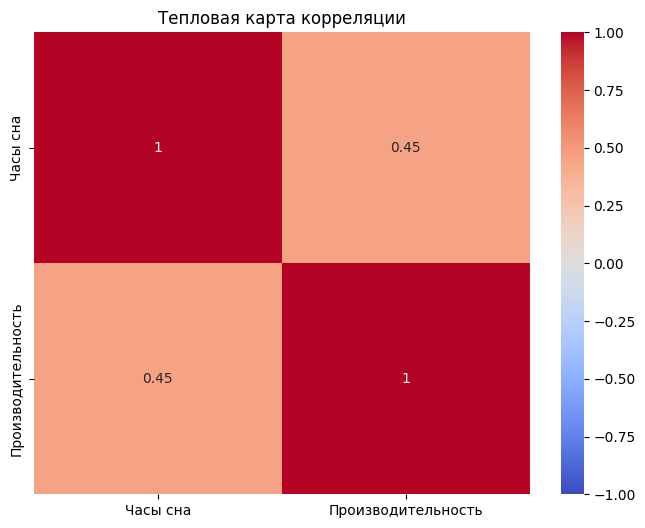


Коэффициент корреляции Пирсона: 0.45
P-значение: 0.0000
Связь статистически значима (p < 0.05)
Сила связи: средняя


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Создаем случайные данные
np.random.seed(0)
sleep_hours = np.random.normal(7, 1, 100)
productivity = 70 + 4 * sleep_hours + np.random.normal(0, 10, 100)

# Создаем DataFrame
df = pd.DataFrame({'Часы сна': sleep_hours, 'Производительность': productivity})

# Рассчитываем коэффициент корреляции Пирсона
correlation, p_value = stats.pearsonr(df['Часы сна'], df['Производительность'])

# Создаем график рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Часы сна', y='Производительность', data=df)
plt.title(f'Корреляция между сном и производительностью\nr = {correlation:.2f}, p = {p_value:.4f}')
plt.xlabel('Часы сна')
plt.ylabel('Производительность (%)')

# Добавляем линию регрессии
sns.regplot(x='Часы сна', y='Производительность', data=df, scatter=False, color='red')

plt.show()

# Выводим корреляционную матрицу
correlation_matrix = df.corr()
print("Корреляционная матрица:")
print(correlation_matrix)

# Визуализируем корреляционную матрицу
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Тепловая карта корреляции')
plt.show()

# Интерпретация результатов
print(f"\nКоэффициент корреляции Пирсона: {correlation:.2f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Связь статистически значима (p < 0.05)")
else:
    print("Связь статистически не значима (p >= 0.05)")

if abs(correlation) < 0.3:
    strength = "слабая"
elif abs(correlation) < 0.7:
    strength = "средняя"
else:
    strength = "сильная"

print(f"Сила связи: {strength}")

In [13]:
study_hours = [1, 2, 3, 4, 5, 6, 7]
test_scores = [65, 70, 80, 85, 85, 90, 95]

correlation, p_value = stats.pearsonr(study_hours, test_scores)

print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation coefficient: 0.97
P-value: 0.0002


# Lecture 5, Classic ML, ML Intro & Supervised Learning

## Lib import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import make_regression, make_classification

## Linear Regression example, 1-D feature

In a simple linear regression model with one feature, the relationship between the feature \( x \) and the target variable \( y \) is modeled as a linear equation:

$$
y = \beta_0 + \beta_1 x
$$

Where:
- \( y \) is the predicted value.
- \( \beta_0 \) is the intercept of the regression line (also known as the bias term).
- \( \beta_1 \) is the coefficient for the feature \( x \) (also known as the slope of the regression line).
- \( x \) is the input feature.

Mean Squared Error: 107.90


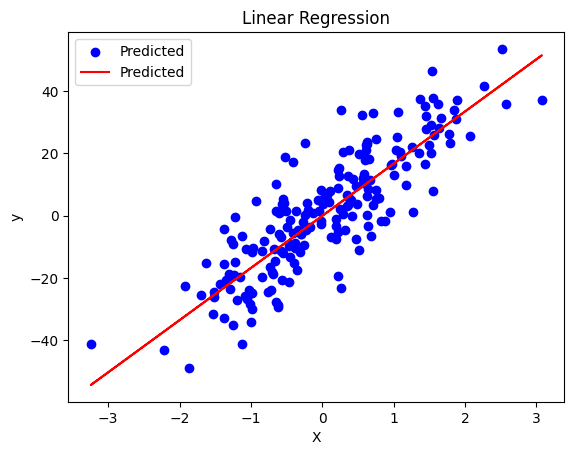

In [13]:
# Generate sample data
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Predicted')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Interpretation

In [14]:
print(f'Weights: {model.coef_}')
print(f'Bias: {model.intercept_}')

Weights: [16.71653147]
Bias: -0.09250102697112714


In [16]:
print(f'Sample test input:\n{X_test[:10].reshape(-1)}\n')
print(f'Predictions:\n{model.predict(X_test[:10])}\n')
y_pred_1 = X_test[:10]*model.coef_+model.intercept_
print(f'Predictions, manually calculated:\n{y_pred_1.reshape(-1)}')
print(f'Sanity check: {np.allclose(model.predict(X_test[:10]), y_pred_1.reshape(-1))}')

Sample test input:
[ 1.52302986  0.3520554   1.8820245  -0.98572605 -0.64657288  0.19655478
  0.75698862 -0.51604473 -0.55547712 -1.35168461]

Predictions:
[ 25.3672755    5.79264409  31.3684207  -16.5704215  -10.900957
   3.19321308  12.56172301  -8.71897897  -9.37815177 -22.68797928]

Predictions, manually calculated:
[ 25.3672755    5.79264409  31.3684207  -16.5704215  -10.900957
   3.19321308  12.56172301  -8.71897897  -9.37815177 -22.68797928]
Sanity check: True


## Linear Regression, 2-D feature

In a linear regression model with two features, the relationship between the features \( x_1 \), \( x_2 \) and the target variable \( y \) is modeled as a linear equation:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

Where:
- \( y \) is the predicted value.
- \( \beta_0 \) is the intercept of the regression plane (also known as the bias term).
- \( \beta_1 \) is the coefficient for the feature \( x_1 \).
- \( \beta_2 \) is the coefficient for the feature \( x_2 \).
- \( x_1 \) and \( x_2 \) are the input features.

Mean Squared Error: 103.18


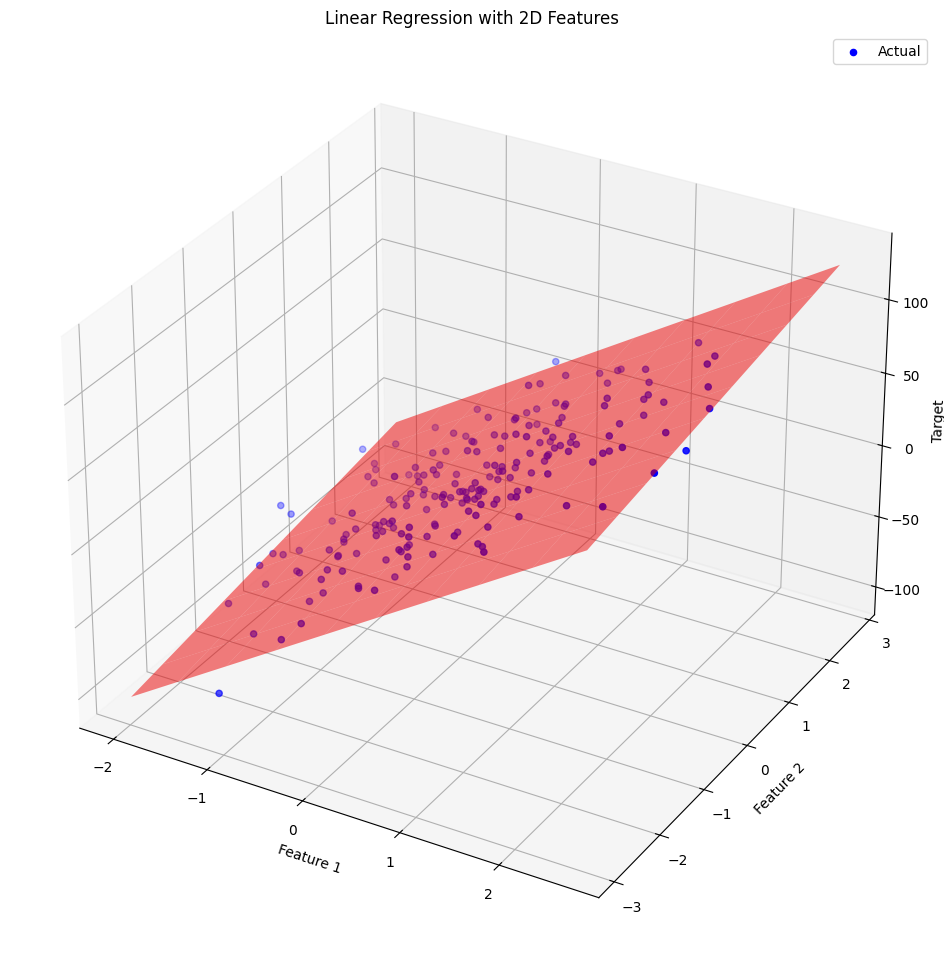

In [17]:
# Generate sample data with 2 features
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize the results in 3D
fig = plt.figure(figsize=(18, 12))  # Adjust the figure size to be 2 times wider and higher
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')

# Create a mesh grid for plotting the plane
x_surf, y_surf = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 10),
                             np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 10))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Linear Regression with 2D Features')
plt.legend()
plt.show()

## MSE implementation

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In [23]:
import numpy as np

def calculate_mse(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку (MSE) между истинными и предсказанными значениями.

    :param y_true: numpy массив истинных значений
    :param y_pred: numpy массив предсказанных значений
    :return: значение MSE
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [24]:
mse_manual = calculate_mse(y_test, y_pred)

print(f'MSE calculated manually: {mse_manual:.2f}')
print(f'MSE calculated by the function: {mse:.2f}')

MSE calculated manually: 103.18
MSE calculated by the function: 103.18


## Logistic Regression, 2-D feature

In a logistic regression model with two features, the relationship between the features \( x_1 \), \( x_2 \) and the probability \( p \) of the target variable \( y \) being 1 is modeled using the logistic function:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}
$$

Where:
- \( p \) is the probability of the target variable \( y \) being 1.
- \( \beta_0 \) is the intercept (also known as the bias term).
- \( \beta_1 \) is the coefficient for the feature \( x_1 \).
- \( \beta_2 \) is the coefficient for the feature \( x_2 \).
- \( x_1 \) and \( x_2 \) are the input features.


Logistic Regression Example:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


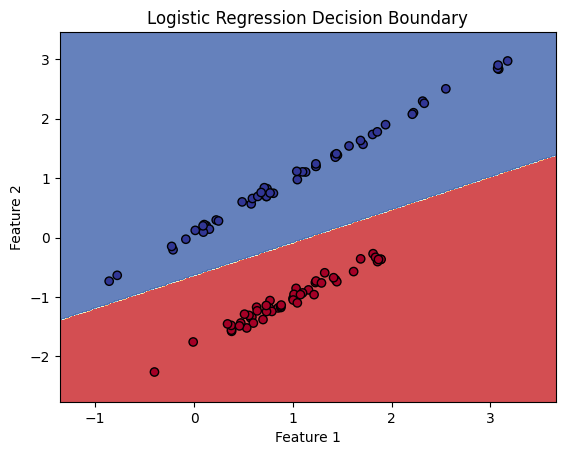

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 4. Logistic Regression
print("\nLogistic Regression Example:")

# Generate sample data
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu,
            edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## Linear Discriminator

The sigmoid function is a mathematical function that produces an "S"-shaped curve. It is often used in machine learning, particularly in logistic regression and neural networks, to map predictions to probabilities.

The formula for the sigmoid function is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Where:
- \( \sigma(x) \) is the sigmoid function.
- \( x \) is the input value.
- \( e \) is the base of the natural logarithm, approximately equal to 2.71828.

The sigmoid function outputs values between 0 and 1, making it useful for binary classification problems.


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


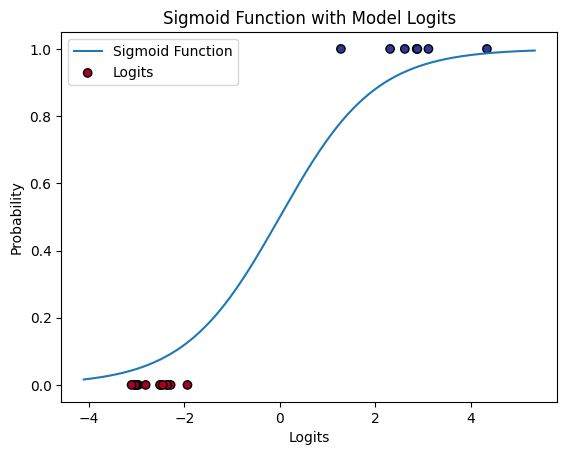

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate sample data
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot sigmoid function and model logits
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Get logits (raw model outputs)
logits = model.decision_function(X_test)

# Generate values for plotting sigmoid function
x_values = np.linspace(logits.min() - 1, logits.max() + 1, 300)
y_values = sigmoid(x_values)

plt.figure()
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.scatter(logits, y_test, c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', label='Logits')
plt.xlabel('Logits')
plt.ylabel('Probability')
plt.title('Sigmoid Function with Model Logits')
plt.legend()
plt.show()

In [29]:
print(f'Model coefficients: {model.coef_}')
print(f'Model intercept: {model.intercept_}')

Model coefficients: [[-1.63568053  2.95772932]]
Model intercept: [1.88757463]


$$
\text{logit}(p) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0
$$

$$
 x_2 = -\frac{\beta_0}{\beta_2} - \frac{\beta_1}{\beta_2} x_1 
$$

In [30]:
b0 = model.intercept_[0]
b1 = model.coef_[0, 0]
b2 = model.coef_[0, 1]

x1 = X_test[:, 0]
x2 = X_test[:, 1]

In [31]:
x1

array([ 1.68674524,  0.87717639,  0.59137345, -0.77719676,  1.29021194,
        1.85766106,  1.88782031,  0.64569333,  0.63944087,  1.22831184,
        0.57885884,  0.76916909,  0.73375167,  0.87971932,  0.24802757,
        0.58590018,  0.37705866,  1.93866732,  0.73902766,  1.61550606])

In [33]:
-b0/b2 -b1/b2 * x1

array([ 0.29461848, -0.15308848, -0.31114294, -1.06798827,  0.07532803,
        0.38913818,  0.40581682, -0.28110301, -0.28456074,  0.04109609,
       -0.31806376, -0.21281857, -0.23240508, -0.15168219, -0.50101974,
       -0.31416976, -0.42966309,  0.43393618, -0.22948736,  0.25522186])

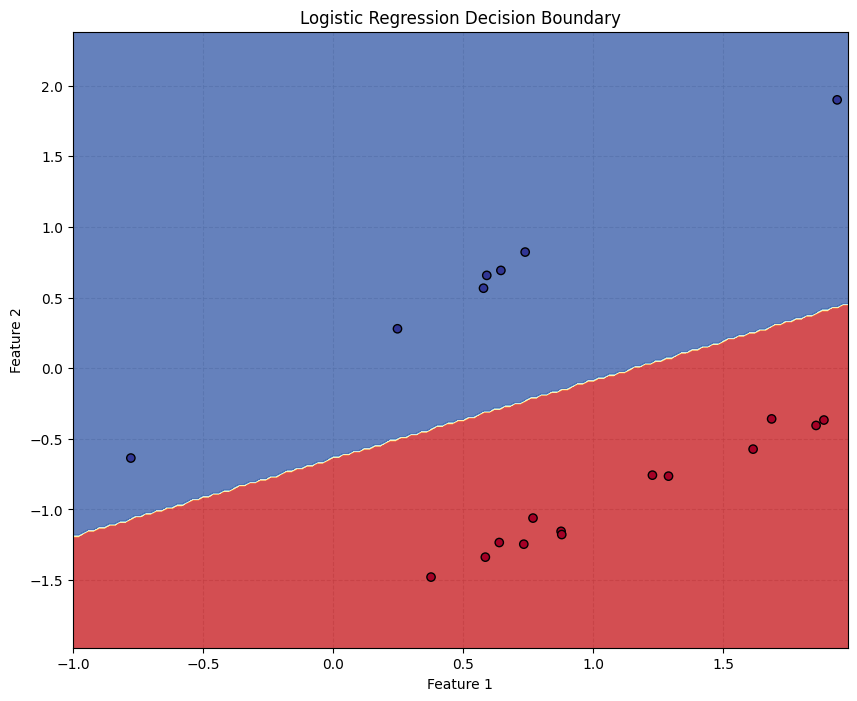

In [34]:
x_min, x_max = -1, 2
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=plt.cm.RdYlBu,
            edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Ensure grid is behind the plot elements
plt.gca().set_axisbelow(True)

plt.show()

## Breast Cancer Example

Missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Accuracy: 0.9737


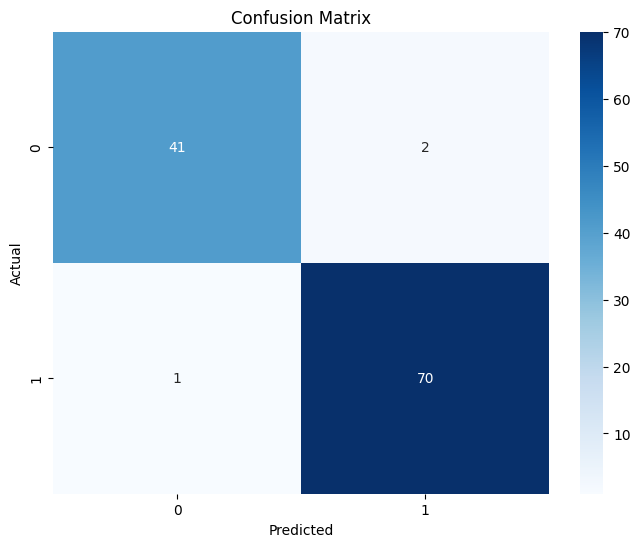


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Cross-validation scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Mean CV score: 0.9736


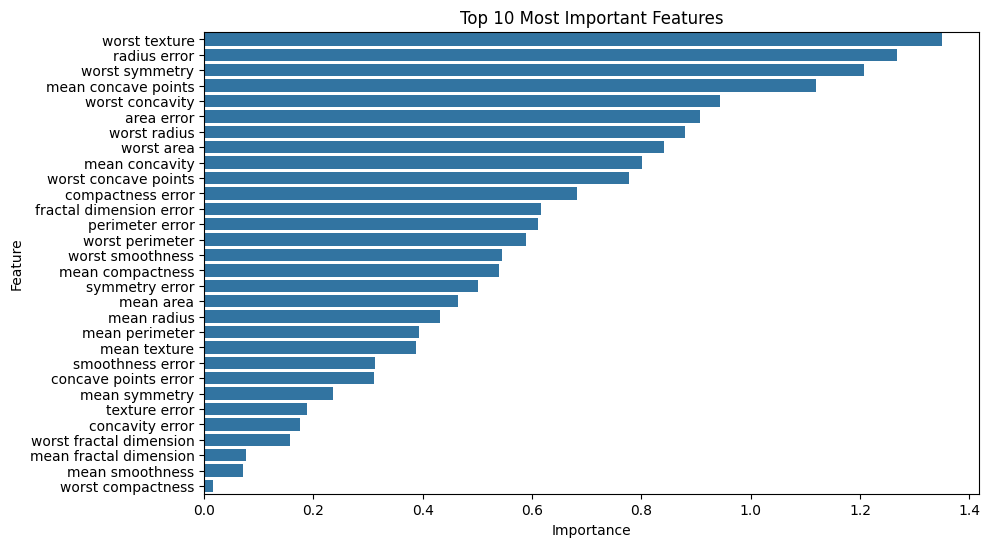

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a DataFrame for easier data manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Data preprocessing
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

# Feature importance
feature_importance = pd.DataFrame({'feature': data.feature_names, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()